# Car Dataset Exploration

We start by examining our data. We do this using the 'Pandas' and 'Matplotlib' packages in python.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Vehiclefile_Test.xlsx')
df.head()

,ABI__8_Digit_,Vehicle_Model,Vehicle_Years,Vehicle_Brand,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Fuel,Vehicle_Length,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Vehicle_Power_to_Weight_Ratio,Vehicle_Transmission,Premium
0,101602,REXTON RX270 SE CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,81.2,Automatic,300.270000
1,101701,REXTON RX270 SX CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,75.0,Manual,384.105000
2,101702,REXTON RX270 SX CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,28.5,162.3,146.3,Automatic,280.936667
3,101901,REXTON RX270 S CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,32.8,162.3,75.0,Manual,NaN
4,101902,REXTON RX270 S CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,75.0,Automatic,285.713333


We use the regex module below to extract the manufacturing years of each vehicle.

In [2]:
import re

def get_lower_age(entry):
    """function to extract the production years of an entry"""
    match_obj = re.compile(r'(\d{4})-(\d{4})?')    #separate data entry into two groups
    matches = match_obj.search(entry['Vehicle_Years'])
    
    return int(matches.group(1))
    
    

def get_upper_age(entry):
    """function to extract the production years of an entry"""
    match_obj = re.compile(r'(\d{4})-(\d{4})?')    #separate data entry into two groups
    matches = match_obj.search(entry['Vehicle_Years'])

    if matches.group(2) != None:            #check if data is of type 20xx- or 20xx-20xx
        return int(matches.group(2))

    else:
        return None

df['Start_Years'] = df.apply(get_lower_age,axis=1)    #extract data
df['End_Years'] = df.apply(get_upper_age,axis=1)


df.loc[15:20]    #view some data

,ABI__8_Digit_,Vehicle_Model,Vehicle_Years,Vehicle_Brand,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Fuel,Vehicle_Length,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Vehicle_Power_to_Weight_Ratio,Vehicle_Transmission,Premium,Start_Years,End_Years
15,102802,KYRON SX CDI ESTATE,2006-2008,SSANGYONG,5,1998,Diesel,4660.0,103,33.6,139.5,71.3,Automatic,310.166000,2006,2008.0
16,102901,REXTON RX 270 SX CRD (185) ESTATE,2007-2008,SSANGYONG,5,2696,Diesel,4720.0,112,30.7,183.7,84.5,Automatic,297.556000,2007,2008.0
17,103001,RODIUS S CDI ESTATE,2008-,SSANGYONG,5,2696,Diesel,5125.0,106,32.1,162.3,74.4,Manual,NaN,2008,NaN
18,103101,RODIUS ES CDI ESTATE,2008-,SSANGYONG,5,2696,Diesel,5125.0,105,32.1,162.3,74.4,Manual,280.895000,2008,NaN
19,103102,RODIUS ES CDI ESTATE,2008-,SSANGYONG,5,2696,Diesel,5125.0,108,29.1,162.3,77.1,Automatic,311.170000,2008,NaN
20,103301,REXTON 270 S CRD ESTATE,2008-,SSANGYONG,5,2696,Diesel,4720.0,112,30.4,162.3,75.0,Manual,218.383333,2008,NaN


We see that various entries are missing. We can quantify this using the command below, which displays the total number of missing entries for each piece of data.

In [3]:
df.apply(lambda x: sum(x.isnull()),axis=0)

ABI__8_Digit_                       0
Vehicle_Model                       0
Vehicle_Years                       0
Vehicle_Brand                       0
Vehicle_Doors                       0
Vehicle_Engine_CC                   0
Vehicle_Fuel                        0
Vehicle_Length                   2028
Vehicle_Maximum_Speed               0
Vehicle_MPG                      2028
Vehicle_Power                       0
Vehicle_Power_to_Weight_Ratio    2028
Vehicle_Transmission                0
Premium                          3981
Start_Years                         0
End_Years                        2967
dtype: int64

To create a model for our data, we will need to remove all the data entries with missing values, except premiums. We display the clean data set below.

In [4]:
clean_df = df.dropna(subset=['Vehicle_Length','Vehicle_MPG','Vehicle_Power_to_Weight_Ratio','End_Years'],axis=0)
clean_df.head()

,ABI__8_Digit_,Vehicle_Model,Vehicle_Years,Vehicle_Brand,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Fuel,Vehicle_Length,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Vehicle_Power_to_Weight_Ratio,Vehicle_Transmission,Premium,Start_Years,End_Years
0,101602,REXTON RX270 SE CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,81.2,Automatic,300.270000,2004,2007.0
1,101701,REXTON RX270 SX CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,75.0,Manual,384.105000,2004,2007.0
2,101702,REXTON RX270 SX CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,28.5,162.3,146.3,Automatic,280.936667,2004,2007.0
3,101901,REXTON RX270 S CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,32.8,162.3,75.0,Manual,NaN,2004,2007.0
4,101902,REXTON RX270 S CRD (163) ESTATE,2004-2007,SSANGYONG,5,2696,Diesel,4720.0,111,30.1,162.3,75.0,Automatic,285.713333,2004,2007.0


Now we confirm that we have enough remaining data points to determine correlations between variables.

In [5]:
clean_df.shape


(15416, 16)

Now, we create a correlation matrix to determine which features to include in our model.
At this point, we ignore the vehicle model/brand attributes since they are discrete data.

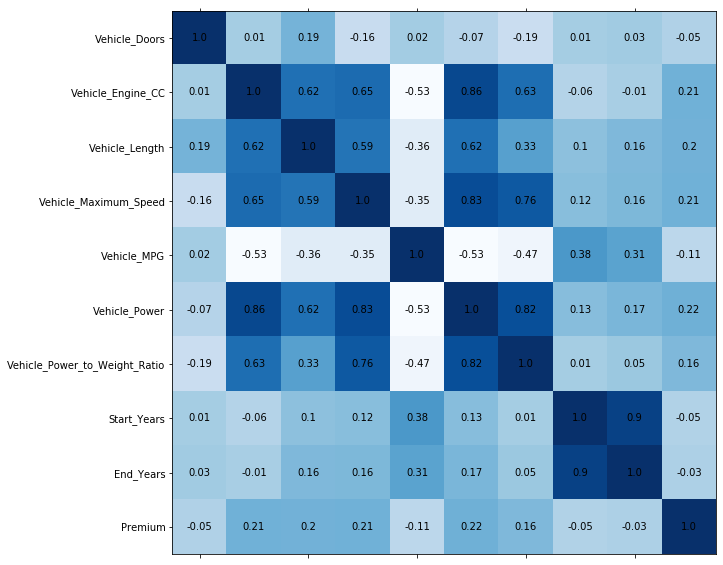

In [6]:
import matplotlib.ticker as ticker

Possible_Features = ['Vehicle_Doors',
                     'Vehicle_Engine_CC',
                     'Vehicle_Length',
                     'Vehicle_Maximum_Speed',
                     'Vehicle_MPG',            
                     'Vehicle_Power',
                     'Vehicle_Power_to_Weight_Ratio',
                     'Start_Years',
                     'End_Years',
                     'Premium'
    ]

#create correlation matrix
corr = clean_df.corr().loc[Possible_Features,Possible_Features]

fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(corr,cmap=plt.cm.Blues)

ax.set_yticklabels(['']+Possible_Features)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.axes.get_xaxis().set_ticklabels([])



#write explicit values
for i in range(len(Possible_Features)):
    for j in range(len(Possible_Features)):
        text = ax.text(i,j,round(corr.iloc[i].iloc[j],2),va='center',ha='center')

plt.show()

The missing features we found earlier were: Vehicle_Length, Vehicle_MPG, Vehicle_Power_to_Weight_Ratio, End_Years and Premium. We identify the strongest relevant correlations below: 

Vehicle_Maximum_Speed and Vehicle_Power_to_Weight_Ratio

Vehicle_Power and Vehicle_Power_to_Weight_Ratio

End_Years and Start_Years

We plot graphs of each relation above to determine if a univariate regression line is suitable for extrapolating the data.

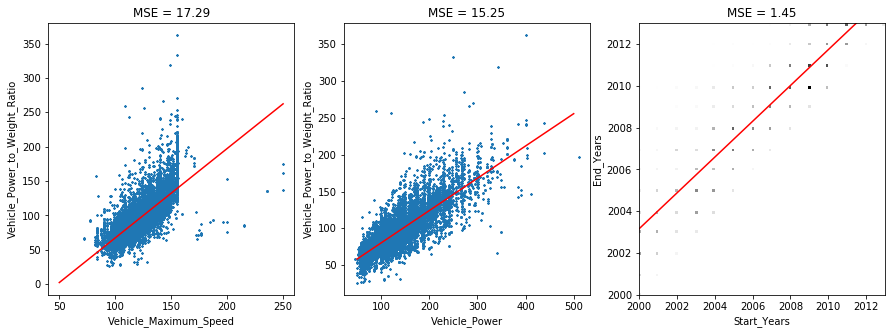

In [7]:
from numpy.polynomial.polynomial import polyfit
import numpy as np

#function to automate plotting and creating a regression line
def fit_plot(x,y,lb,ub):
    b, m = polyfit(x,y,1)
    predicted = np.array(b + m*x)
    mse = np.sqrt(((predicted-y)**2).mean())
    a = np.linspace(lb,ub,10000)
    plt.plot(a,b+a*m,'r')
    plt.title('MSE = ' + str(mse.round(2)))
    return b, m

f = plt.figure(figsize=(15,5))


#first plot
plt.subplot(131)

plt.scatter(clean_df['Vehicle_Maximum_Speed'],clean_df['Vehicle_Power_to_Weight_Ratio'],s=3,marker='x',edgecolor='')
plt.xlabel('Vehicle_Maximum_Speed')
plt.ylabel('Vehicle_Power_to_Weight_Ratio')

b1, m1 = fit_plot(clean_df['Vehicle_Maximum_Speed'],clean_df['Vehicle_Power_to_Weight_Ratio'],50,250)


#second plot
plt.subplot(132)
plt.scatter(clean_df['Vehicle_Power'],clean_df['Vehicle_Power_to_Weight_Ratio'],s=3,marker='x',edgecolor='')
plt.xlabel('Vehicle_Power')
plt.ylabel('Vehicle_Power_to_Weight_Ratio')

b2, m2 = fit_plot(clean_df['Vehicle_Power'],clean_df['Vehicle_Power_to_Weight_Ratio'],50,500)


#use a histogram coloured by density since many data points overlap
plt.subplot(133)
plt.hist2d(clean_df['Start_Years'],clean_df['End_Years'],(100,100),cmap=plt.cm.Greys)
plt.xlabel('Start_Years')
plt.ylabel('End_Years')

b3, m3 = fit_plot(clean_df['Start_Years'],clean_df['End_Years'],1998,2013)


plt.show()

We see that the regression line in the last scenario performs quite well. The first two graphs suggest a complex relationship between Vehicle_Power, Vehicle_Maximum_Speed and Vehicle_Power_to_Weight_Ratio. We may consider other models (eg logistic, random forest) but for simplicity and the moderate performance of the regression line, we will use the linear regression line as a predictor for Vehicle_Power_to_Weight_Ratio given Vehicle_Power and similarly for predicting end years given start years.

In using this method we see that our predictions are transparent, meaning that we can see exactly how our data is being used to make the predictions. Furthermore, the calculations used to produce this model scale well with the amount of data, meaning that the computational resources needed are relatively low. However, in ignoring the other variables we sacrifice possible accuracy gains in exchange for simplicity. More complex methods may be able to take advantage of all information present, possibly giving a better accuracy.

We may think of considering some multivariate model, but on closer examination of the data we see that the entries with missing
values all miss either end year and/or the premiums and/or all three of Vehicle Power to Weight ratio (pwr), MPG and 
Vehicle Length. We confirm this below.

In [8]:
missing_power = df.apply(lambda x : 0 if x['Vehicle_Power']== np.NaN  else 1 , axis = 1).sum()
missing_mpg = df.apply(lambda x : 0 if x['Vehicle_MPG']== np.NaN  else 1 , axis = 1).sum()
missing_pwr = df.apply(lambda x : 0 if x['Vehicle_Length']== np.NaN  else 1 , axis = 1).sum()
missing_all_three = df.apply(lambda x : 0 if x['Vehicle_Power']== np.NaN and x['Vehicle_Length']== np.NaN and x['Vehicle_MPG']== np.NaN else 1 , axis = 1).sum()

print('Number of entries missing Vehicle Power: ' + str(missing_power))
print('Number of entries missing Vehicle MPG: ' + str(missing_mpg))
print('Number of entries missing Vehicle PWR: ' + str(missing_pwr))
print('Number of entries missing All three: ' + str(missing_all_three))

Number of entries missing Vehicle Power: 20110
Number of entries missing Vehicle MPG: 20110
Number of entries missing Vehicle PWR: 20110
Number of entries missing All three: 20110


Our correlation matrix shows medium-strong correlations between MPG and 'Vehicle_Engine_CC'. We may also expect transmission type and fuel type to be important variables, so we visualise their relations below to see if any patterns emerge.

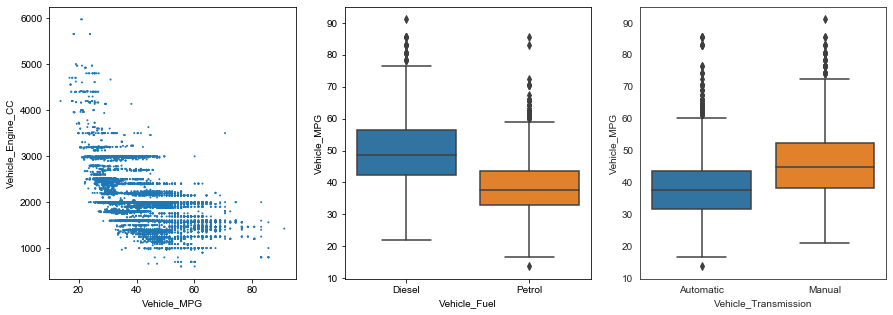

In [9]:
import seaborn as sns

f = plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(clean_df['Vehicle_MPG'], clean_df['Vehicle_Engine_CC'], s=4, edgecolor='')
plt.xlabel('Vehicle_MPG')
plt.ylabel('Vehicle_Engine_CC')
    
plt.subplot(132)
sns.set_style('white')
ax = sns.boxplot(x='Vehicle_Fuel',y='Vehicle_MPG',data=clean_df)

plt.subplot(133)
sns.set_style('white')
ax = sns.boxplot(x='Vehicle_Transmission',y='Vehicle_MPG',data=clean_df)
    
plt.show()

We see some non-trivial relationships between mpg and these variables but they are unclear. We therefore turn to machine learning algorithms (we will use random forests in this case) to determine a way to calculate mpg.

Some disadvantages to using this method are that we will not know how the resulting models will work because they are very complex and that these methods are prone to overfitting (where the models will perform well on training data but poorly on testing data). Moreover, this method does not scale well with the amount of data we have. If we wish to update our model with more information, it will be computationally expensive.

However, random forest models allow complex relationships to be identified and their accuracy is generally very high. We will also be able to incorporate more information into the models, in particular the transmission and fuel types, which we couldn't use in the linear regression models because they are discrete data. This should lead to a more accurate model.

We first use drop any unnecessary columns.

In [10]:
mpg_df = clean_df.drop(['ABI__8_Digit_','Vehicle_Model','Vehicle_Years','Premium','Vehicle_Length','End_Years',
    'Vehicle_Power_to_Weight_Ratio'],axis=1)

mpg_df = pd.get_dummies(mpg_df) #use one hot encoding

We partition our clean data into roughly 90% training data to train our models and 10% testing data to validate our models.

In [11]:
list_mask = np.random.rand(mpg_df.shape[0]) < 0.9

train_df = mpg_df[list_mask]
test_df = mpg_df[~list_mask]
train_df.head()

,Vehicle_Doors,Vehicle_Engine_CC,Vehicle_Maximum_Speed,Vehicle_MPG,Vehicle_Power,Start_Years,Vehicle_Brand_ALFA ROMEO,Vehicle_Brand_AUDI,Vehicle_Brand_BMW,Vehicle_Brand_CHEVROLET,...,Vehicle_Brand_SUBARU,Vehicle_Brand_SUZUKI,Vehicle_Brand_TOYOTA,Vehicle_Brand_VAUXHALL,Vehicle_Brand_VOLKSWAGEN,Vehicle_Brand_VOLVO,Vehicle_Fuel_Diesel,Vehicle_Fuel_Petrol,Vehicle_Transmission_Automatic,Vehicle_Transmission_Manual
0,5,2696,111,30.1,162.3,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5,2696,111,28.5,162.3,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5,2696,111,32.8,162.3,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,5,2696,111,30.1,162.3,2004,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,5,2696,111,28.5,162.3,2005,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


We now use scikitlearn to assess which of our features are most important, 

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor(n_estimators=40,n_jobs=-1)
model.fit(train_df.drop(['Vehicle_MPG'],axis=1),train_df['Vehicle_MPG'])

f_imp = pd.DataFrame({'Features': train_df.drop(['Vehicle_MPG'],axis=1).columns, 'Importance': model.feature_importances_}).sort_values('Importance',ascending=False)
f_imp.head(10)

,Features,Importance
1,Vehicle_Engine_CC,0.498082
47,Vehicle_Fuel_Diesel,0.266623
2,Vehicle_Maximum_Speed,0.064363
4,Start_Years,0.055042
3,Vehicle_Power,0.049123
49,Vehicle_Transmission_Automatic,0.018673
7,Vehicle_Brand_BMW,0.006168
0,Vehicle_Doors,0.005692
50,Vehicle_Transmission_Manual,0.004220
34,Vehicle_Brand_RENAULT,0.002560


We see that the most important features are Vehicle_Engine_CC, Vehicle_Fuel_Diesel, Vehicle_Maximum_Speed, Start_Years, Vehicle_Power and Vehicle_Transmission_Automatic, so we include only these features to avoid overfitting. We assess the effectiveness of our model below.

In [13]:
features = ['Vehicle_Engine_CC','Vehicle_Fuel_Diesel','Vehicle_Maximum_Speed','Start_Years','Vehicle_Power','Vehicle_Transmission_Automatic']

mpg_model = RandomForestRegressor(n_estimators=40,n_jobs=-1,oob_score=True)
mpg_model.fit(train_df[features],train_df['Vehicle_MPG'])

mpg_pred = mpg_model.predict(test_df[features])
mpg_actual = test_df['Vehicle_MPG']

mse = np.sqrt(((mpg_pred - mpg_actual)**2).mean())
print('Mean squared error: ' + str(mse))

Mean squared error: 2.222279516324073


This is a relatively small error, so this model should accurately fill in the missing vehicle mpg values.

For predicting Vehicle Length I expect that this method will miss some of the pertinent features, such as Vehicle_Model and Vehicle_Brand because these features take many values and we do not have enough data to fit a machine learning model. We will have to take a different approach. First examine plots of vehicle length against Vehicle CC, Max Speed and Power - the three variables that vehicle length is most correlated with.

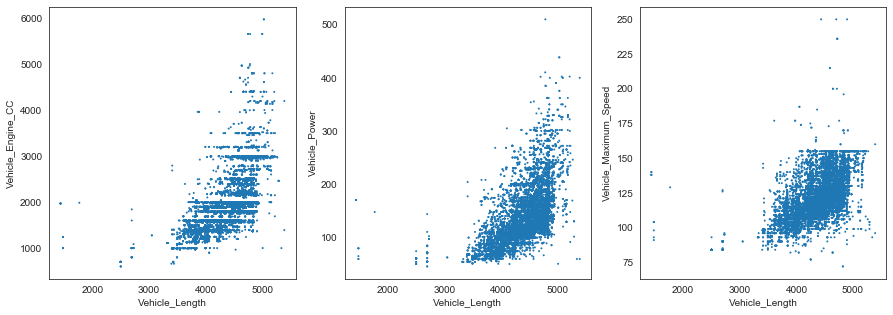

In [14]:
f = plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(clean_df['Vehicle_Length'], clean_df['Vehicle_Engine_CC'], s=4, edgecolor='')
plt.xlabel('Vehicle_Length')
plt.ylabel('Vehicle_Engine_CC')
    
plt.subplot(132)
plt.scatter(clean_df['Vehicle_Length'], clean_df['Vehicle_Power'], s=4, edgecolor='')
plt.xlabel('Vehicle_Length')
plt.ylabel('Vehicle_Power')

plt.subplot(133)
plt.scatter(clean_df['Vehicle_Length'], clean_df['Vehicle_Maximum_Speed'], s=4, edgecolor='')
plt.xlabel('Vehicle_Length')
plt.ylabel('Vehicle_Maximum_Speed')

plt.show()

These plots indicate some complex relationships between the variables mentioned above.

We now examine box plots for the data, grouped by brand name. We can see that for each brand, the median length is roughly indicative of their general lengths. Therefore, our method for filling in lengths is to first check for and use other entries that are the same model of a missing instance, since we expect them to have the same length. Failing this, we will use the median length of a car of that brand.

We acknowledge that this may lead to inaccuracies as there are pairs of cars in our dataset that are the same model but have different lengths, but we expect these differences to be small.

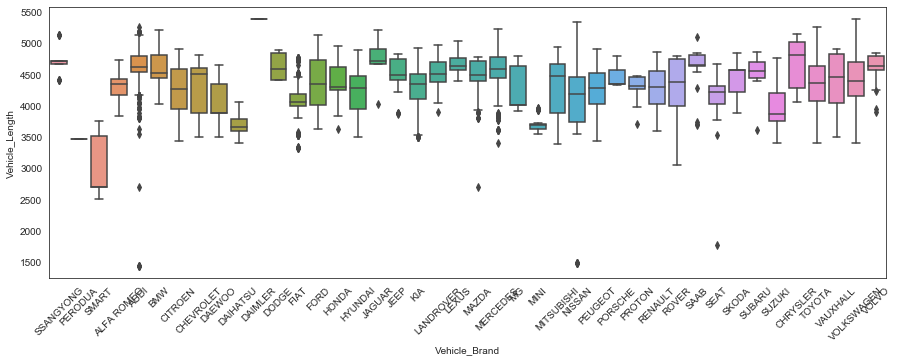

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(15,5))

sns.set_style('white')
ax = sns.boxplot(x='Vehicle_Brand',y='Vehicle_Length',data=clean_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

We now test the accuracy of our proposed model.

In [16]:
medians = clean_df.groupby('Vehicle_Brand').median()

#function to implement method outlined above
def get_length(entry,train_df):
    model = entry['Vehicle_Model']
    
    if (train_df['Vehicle_Model'] == model).any():
        return train_df[train_df['Vehicle_Model']==model].Vehicle_Length.mean()
        
    return medians.loc[entry['Vehicle_Brand']].Vehicle_Length

length_df = clean_df.copy()

#split into training and testing data
list_mask = np.random.rand(mpg_df.shape[0]) < 0.90

l_train_df = length_df[list_mask]
l_test_df = length_df[~list_mask]

#test model
l_predict_df = l_test_df.apply(lambda x: get_length(x,l_train_df), axis=1)
l_actual_df = l_test_df.Vehicle_Length

mse = np.sqrt(((l_predict_df - l_actual_df)**2).mean())
print('MSE is: ' + str(mse))
(l_predict_df - l_actual_df).head(10)

MSE is: 252.87146858397097


32        0.0
45      195.0
63      195.0
69    -1057.0
82        0.0
92        0.0
105       0.0
130     -90.0
132     -69.0
139       0.0
dtype: float64

This error looks pretty bad, but we may remedy this by returning 'None' instead of the median and using another model to fill in the remaining blanks. However, for simplicity I will not do this. Considering this error compared to the characteristic length of a car, we obtain a relative error of roughly 0.253 (= (252.87...)/1000) (1000 is the typical scale for vehicle length).

As expected, for a simple model this has a pretty low accuracy. However, it scales well with data and we can visualise the results we obtain. We may also easily modify this method (as mentioned above) to make more accurate predictions.

We now examine boxplots for the premiums, just like we did for the Vehicle MPGs.

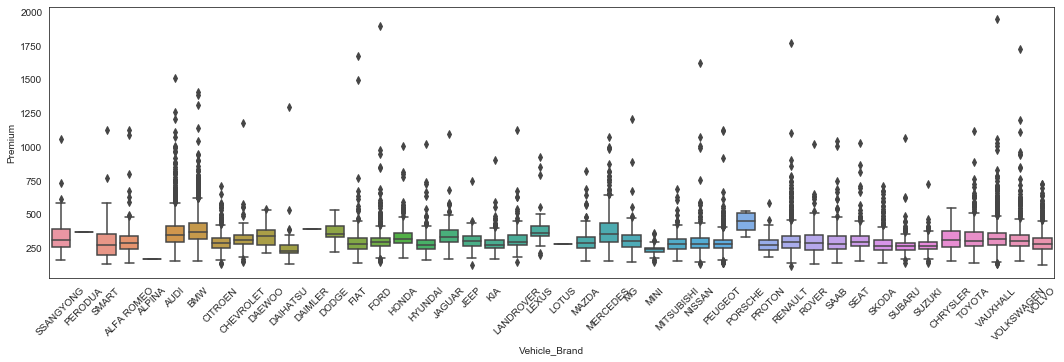

In [17]:
pr_df = df.dropna(subset=['Premium'],axis=0)

f = plt.figure(figsize=(18,5))

sns.set_style('white')
ax = sns.boxplot(x='Vehicle_Brand',y='Premium',data=pr_df)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

The range of the upper and lower quartiles for each brand is tightly spread, so it would be sensible to use the median premium for each manufacturer as a predictor for the missing premiums. We see that there are a lot of outliers above the upper quartiles for most brands, although we should not be too concerned about this as the probability of assigning a low premium for a random vehicle is low. We note this method works especially well for brands like Dodge and Chrysler, since their premiums are not very spead out.

In [18]:
#split into testing data
#some car brands may not appear in training data, so must use the whole set
list_mask = np.random.rand(pr_df.shape[0]) < 0.9

p_test_df = pr_df[~list_mask]

p_medians = pr_df.groupby('Vehicle_Brand').median().Premium

pred_prem = p_test_df.apply(lambda x: p_medians[x['Vehicle_Brand']], axis = 1)
actual_prem = p_test_df.Premium

mse = np.sqrt(((pred_prem - actual_prem)**2).mean())

print('MSE is: ' + str(mse))
print('Relative error is: ' + str((mse**0.5)/pr_df.Premium.mean()) )  #calculate rmse/mean

MSE is: 105.14015250580633
Relative error is: 0.031818425781466195


We can see that our simple method for finding the premium is quite accurate. Considering the low correlations between premiums and the other variables, we would expect complex relationships between these variables. To improve our model, we could incorporate more variables into our model, such as transmission type or max speed, but this will quickly get complicated. This method is also transparent: we can see exactly how our predictions are being made.

The advantage of this simple model is that it is very easy to implement and that it has moderate accuracy. However, if we are required to use the predicted data for more calculations the errors will compound quickly, leading to inaccurate results. We also expect this method to scale badly with more data: since the range of car models is greater we expect a larger variance in their premiums. A machine learning algorithm may remedy these issues, but this would require more computational resources and data and the resulting models would be too complex to interpret.

We now explain the positives and negatives of filling in the missing data.

Positives: If we have a data set with only a few missing values, we may use the methods above to fill them in. This allows us to retain more information, which could possibly lead to better, more accurate computations based on this data. Further, sometimes throwing away entries with missing values is not an option because the data is expensive/difficult to obtain.

Negatives: However, the calculations based on this data may be inaccurate since the methods used may introduce bias to the data set. The variance of the filled in data will be larger and the resulting distribution will be altered, so using it to calculate, for example confidence intervals, may lead to misleading results. In this data set there are roughly 40% of the entries have at least one missing value. Therefore, using the filled in data will likely lead to major innacuracies.